In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import multiprocessing
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn import datasets

from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
def silhuoette_plot(clus_table, raw_table):
    x = np.array(raw_table.iloc[0,2:8])
    y = np.array(raw_table.iloc[1,2:8])

    #get the cluster names
    cluster = clus_table['cluster'].unique()
    
    #merging the raw data table with cluster table
    merged = pd.merge(raw_table, clus_table, left_on="GENE", right_on='object')
    
    #get the prototype of each gene
    merged['prototype']=merged.iloc[:,2:8].apply(lambda x: np.array(x), axis=1)
    merged = merged[['GENE','cluster','prototype']]
    
    #convert into dictionary
    merged_d = merged.to_dict('list')
    
    #calculate the silhouette score of the cluster
    s_score = silhouette_score(merged_d['prototype'], merged_d['cluster'])
    
    #caclulate the silhouette score for all samples
    merged_d['silhouette'] =  silhouette_samples(merged_d['prototype'], merged_d['cluster'])
    
    #data frame with the scores
    sil = pd.DataFrame.from_dict(merged_d)
    
    y_lower=10
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(20,10)
    txt = 'The silhuoette score of the cluster is ' + str(s_score) + ' and the number of clusters is ' + str(len(cluster))
    for i in range(len(cluster)):
        clusteri = merged['cluster']==cluster[i]
        df = sil[clusteri]
        dic = df.to_dict('list')

        y_upper = y_lower + df.shape[0]

        sortt = sorted(dic['silhouette'])
        color = cm.nipy_spectral(float(i) / len(cluster))
        plt.fill_betweenx(np.arange(y_lower, y_upper), sortt, facecolor=color, edgecolor=color)

        y_lower = y_upper + 1000

    fig.text(.5, .05, txt, ha='center')
    ax.set_title('The Silhouette plot')
    ax.set_xlabel('Silhouette coefficient')
    ax.set_ylabel('Clusters')
    ax.set_yticks([])
    plt.show()

# silhuoette_plot over raw data and normalized data

In [3]:
for16h = pd.read_csv('/home/chit/Desktop/Thesis/data/transcriptome/for16hr.csv')
for16h_norm = pd.read_csv('/home/chit/Desktop/Thesis/data/transcriptome/norm_for16hr.csv')
cluster1 = pd.read_csv('/home/chit/Desktop/Thesis/cluster/16h_k20.csv')
cluster2 = pd.read_csv('/home/chit/Desktop/Thesis/cluster/n16h_k20.csv')

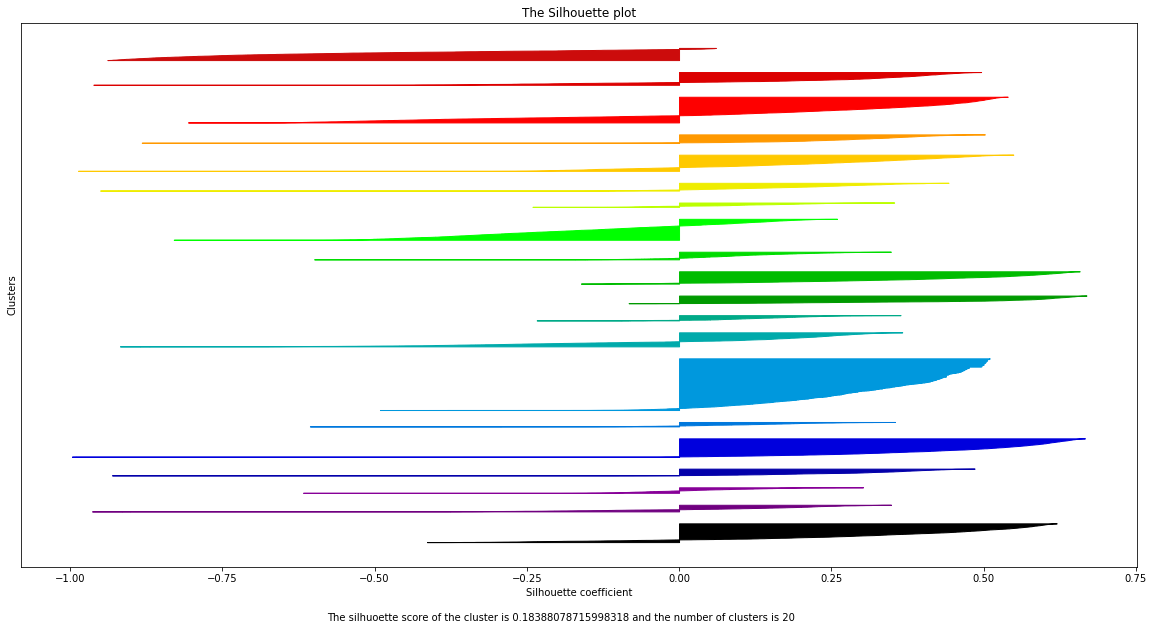

In [5]:
silhuoette_plot(cluster1, for16h)

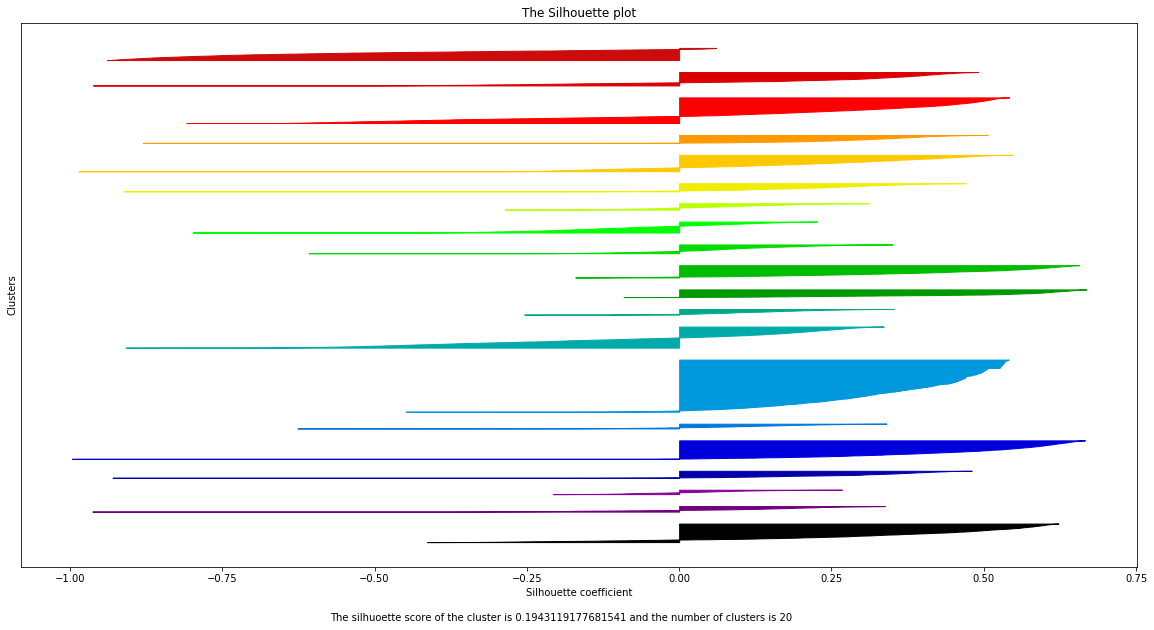

In [6]:
silhuoette_plot(cluster2, for16h_norm)